<a href="https://colab.research.google.com/github/AbdulazizSha1/FitMeal-Community-CPIT305-Group-Project/blob/main/CPIT_380_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries and Installation**

In [2]:
!pip install ultralytics
from google.colab import files
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# Dataset

- We uploaded a set of unlabled images
- The dataset was collected manually


In [3]:


# Create images folder
os.makedirs('images', exist_ok=True)

# Upload files
uploaded = files.upload()

# Move each uploaded image into the images folder
for filename in uploaded.keys():
    os.rename(filename, f'images/{filename}')

print("Images uploaded to 'images/' folder.")

Saving 73_trafficsignals_Chicago-1-1024x640.png to 73_trafficsignals_Chicago-1-1024x640.png
Saving banner-congestion.png to banner-congestion.png
Saving ethan-hooson-BxVKjk1pzXo-unsplash.jpg to ethan-hooson-BxVKjk1pzXo-unsplash.jpg
Saving images (1).jpeg to images (1).jpeg
Saving images.jpeg to images.jpeg
Saving james-coleman-jViepQKI01Q-unsplash.jpg to james-coleman-jViepQKI01Q-unsplash.jpg
Saving lucas-lenzi-ilC0R_h4KEs-unsplash.jpg to lucas-lenzi-ilC0R_h4KEs-unsplash.jpg
Saving manki-kim-EW8o9W_8Bj8-unsplash.jpg to manki-kim-EW8o9W_8Bj8-unsplash.jpg
Saving saketh-PhiOcXJLRR8-unsplash.jpg to saketh-PhiOcXJLRR8-unsplash.jpg
Saving traffic-congestion.jpg to traffic-congestion.jpg
Saving vusal-ibadzade-D2VYpaHpIPc-unsplash.jpg to vusal-ibadzade-D2VYpaHpIPc-unsplash.jpg
Saving yoel-j-gonzalez-omRFB9rakQo-unsplash.jpg to yoel-j-gonzalez-omRFB9rakQo-unsplash.jpg
Images uploaded to 'images/' folder.


# **Object detection**

- yolov8n model was used
- Define specific classes from the model
- Detrmine the shape and color of boxes

In [4]:


# Load  model
model = YOLO("yolov8n.pt")

# Create output folder
os.makedirs("outputs2", exist_ok=True)

# Define classes
vehicle_classes = ['car', 'truck', 'bus', 'motorcycle', 'traffic light']
class_names = model.names

# Loop through images
image_folder = "images"
output_folder = "outputs2"
image_files = sorted(os.listdir(image_folder))

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    results = model(img_path)[0]

    filtered_boxes = []
    for box in results.boxes:
        cls_id = int(box.cls[0])
        label = class_names[cls_id]
        if label in vehicle_classes:
            filtered_boxes.append((label, box.xyxy[0].cpu().numpy(), float(box.conf[0])))

    # Draw filtered boxes
    img = cv2.imread(img_path)
    for label, (x1, y1, x2, y2), conf in filtered_boxes:
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, f'{label} {conf:.2f}', (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

    # Save image with filtered results
    cv2.imwrite(os.path.join(output_folder, img_name), img)

print(" Detection completed and filtered results saved to 'outputs/' folder.")


100%|██████████| 6.25M/6.25M [00:00<00:00, 335MB/s]



image 1/1 /content/images/73_trafficsignals_Chicago-1-1024x640.png: 416x640 6 persons, 12 cars, 1 bus, 1 truck, 2 traffic lights, 323.5ms
Speed: 13.6ms preprocess, 323.5ms inference, 28.0ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/images/banner-congestion.png: 448x640 13 cars, 2 traffic lights, 185.0ms
Speed: 3.6ms preprocess, 185.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/ethan-hooson-BxVKjk1pzXo-unsplash.jpg: 448x640 5 cars, 2 trucks, 1 traffic light, 152.8ms
Speed: 3.9ms preprocess, 152.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/images (1).jpeg: 448x640 19 cars, 4 trucks, 178.9ms
Speed: 3.3ms preprocess, 178.9ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/images.jpeg: 480x640 44 cars, 2 buss, 180.2ms
Speed: 3.0ms preprocess, 180.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 

# **Analyzing** and visuallization 📊

- We used libraries to plot the result
- we used pandas to view the data


image 1/1 /content/images/73_trafficsignals_Chicago-1-1024x640.png: 416x640 6 persons, 12 cars, 1 bus, 1 truck, 2 traffic lights, 207.5ms
Speed: 5.4ms preprocess, 207.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/images/banner-congestion.png: 448x640 13 cars, 2 traffic lights, 154.8ms
Speed: 3.6ms preprocess, 154.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/ethan-hooson-BxVKjk1pzXo-unsplash.jpg: 448x640 5 cars, 2 trucks, 1 traffic light, 154.4ms
Speed: 4.0ms preprocess, 154.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/images (1).jpeg: 448x640 19 cars, 4 trucks, 165.8ms
Speed: 3.1ms preprocess, 165.8ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/images.jpeg: 480x640 44 cars, 2 buss, 169.8ms
Speed: 2.8ms preprocess, 169.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/

,car,truck,bus,motorcycle,traffic light,image,total_vehicles,traffic_rating
0,12,1,1,0,2,73_trafficsignals_Chicago-1-1024x640.png,14,Medium
1,13,0,0,0,2,banner-congestion.png,13,Medium
2,5,2,0,0,1,ethan-hooson-BxVKjk1pzXo-unsplash.jpg,7,Medium
3,19,4,0,0,0,images (1).jpeg,23,Heavy
4,44,0,2,0,0,images.jpeg,46,Heavy
5,4,0,0,0,1,james-coleman-jViepQKI01Q-unsplash.jpg,4,Light
6,3,0,0,1,1,lucas-lenzi-ilC0R_h4KEs-unsplash.jpg,4,Light
7,6,0,0,2,1,manki-kim-EW8o9W_8Bj8-unsplash.jpg,8,Medium
8,11,1,2,0,0,saketh-PhiOcXJLRR8-unsplash.jpg,14,Medium
9,35,0,0,0,0,traffic-congestion.jpg,35,Heavy


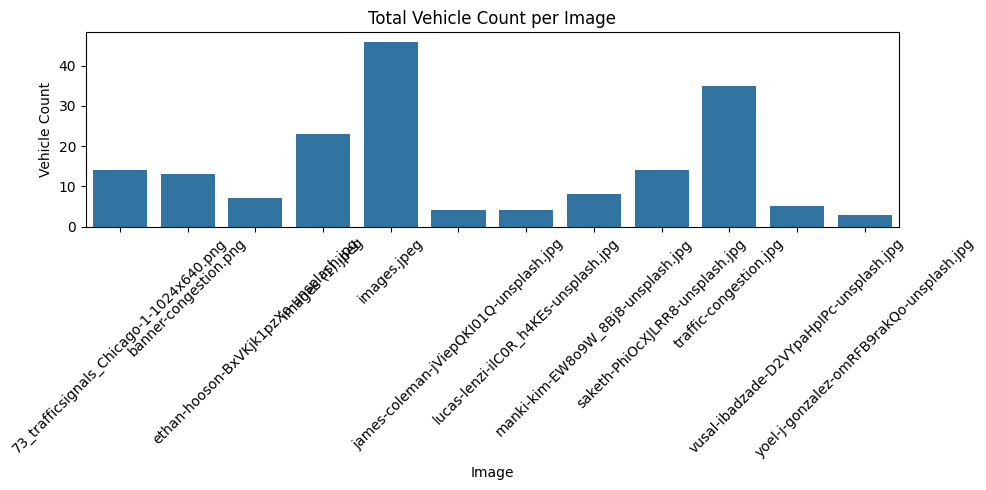

<ipython-input-5-d54f9ca924bf>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='traffic_rating', data=df, palette="Set2")


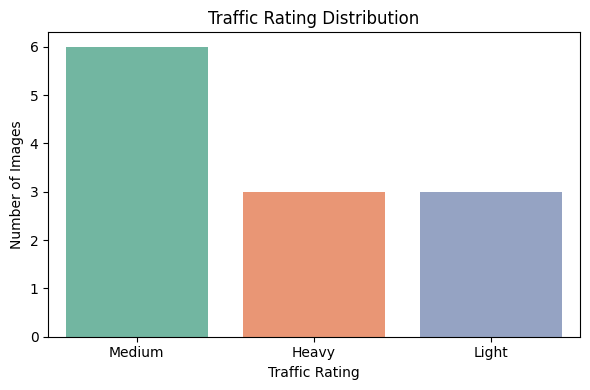

In [5]:


# Prepare for counting
target_classes = ['car', 'truck', 'bus', 'motorcycle', 'traffic light']
class_names = model.names

# Count results storage
results_summary = []

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    results = model(img_path)[0]

    # Count per class
    class_counts = {cls: 0 for cls in target_classes}
    for box in results.boxes:
        cls_id = int(box.cls[0])
        label = class_names[cls_id]
        if label in class_counts:
            class_counts[label] += 1

    # Traffic rating logic
    total_vehicles = class_counts['car'] + class_counts['truck'] + class_counts['bus'] + class_counts['motorcycle']
    if total_vehicles < 5:
        traffic_rating = "Light"
    elif total_vehicles < 15:
        traffic_rating = "Medium"
    else:
        traffic_rating = "Heavy"

    # Store results
    class_counts['image'] = img_name
    class_counts['total_vehicles'] = total_vehicles
    class_counts['traffic_rating'] = traffic_rating
    results_summary.append(class_counts)

#  DataFrame
df = pd.DataFrame(results_summary)

# Display  DataFrame
display(df)

#  Plot total vehicles per image
plt.figure(figsize=(10, 5))
sns.barplot(x='image', y='total_vehicles', data=df)
plt.title("Total Vehicle Count per Image")
plt.xticks(rotation=45)
plt.ylabel("Vehicle Count")
plt.xlabel("Image")
plt.tight_layout()
plt.show()

# Plot traffic level counts
plt.figure(figsize=(6, 4))
sns.countplot(x='traffic_rating', data=df, palette="Set2")
plt.title("Traffic Rating Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Traffic Rating")
plt.tight_layout()
plt.show()


In [6]:


def detect_lanes(image_path, output_path):
    # Read image
    img = cv2.imread(image_path)
    original = img.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Blur the image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges
    edges = cv2.Canny(blur, 50, 150)

    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

    # Draw the lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(original, (x1, y1), (x2, y2), (255, 0, 0), 4)

    # Save the output
    cv2.imwrite(output_path, original)
# Apply lane detection on saved outputs
input_folder = "outputs2"
lane_output_folder = "lane_outputs"
os.makedirs(lane_output_folder, exist_ok=True)

for img_name in sorted(os.listdir(input_folder)):
    input_path = os.path.join(input_folder, img_name)
    output_path = os.path.join(lane_output_folder, img_name)
    detect_lanes(input_path, output_path)

print("✅ Lane detection completed and saved to 'lane_outputs/' folder.")


✅ Lane detection completed and saved to 'lane_outputs/' folder.


In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lanes(image_path, output_path):
    img = cv2.imread(image_path)
    original = img.copy()
    height, width = img.shape[:2]

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Define region of interest (ROI)
    mask = np.zeros_like(edges)
    polygon = np.array([[
        (int(width * 0.1), height),
        (int(width * 0.4), int(height * 0.6)),
        (int(width * 0.6), int(height * 0.6)),
        (int(width * 0.9), height)
    ]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Hough Line Transform
    lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, threshold=50,
                            minLineLength=100, maxLineGap=50)

    # Draw lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(original, (x1, y1), (x2, y2), (0, 255, 255), 4)

    # Save the output image
    cv2.imwrite(output_path, original)

# 🔁 Run lane detection on all images in "outputs/" folder
input_folder = "outputs2"
output_folder = "lane_outputs"
os.makedirs(output_folder, exist_ok=True)

for img_name in sorted(os.listdir(input_folder)):
    input_path = os.path.join(input_folder, img_name)
    output_path = os.path.join(output_folder, img_name)
    detect_lanes(input_path, output_path)

print("✅ Lane detection complete. Results saved to 'lane_outputs/' folder.")


✅ Lane detection complete. Results saved to 'lane_outputs/' folder.


In [8]:
def zone_occupancy(image_path, results, output_path, num_zones=3):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    zone_width = width // num_zones

    # Draw zone lines
    for i in range(1, num_zones):
        x = i * zone_width
        cv2.line(img, (x, 0), (x, height), (255, 0, 255), 2)

    # Define zones
    zones = [0] * num_zones

    # Target vehicle classes
    vehicle_classes = ['car', 'truck', 'bus', 'motorcycle']
    class_names = model.names

    for box in results.boxes:
        cls_id = int(box.cls[0])
        label = class_names[cls_id]
        if label not in vehicle_classes:
            continue

        x1, y1, x2, y2 = map(int, box.xyxy[0])
        x_center = (x1 + x2) // 2
        zone_index = min(x_center // zone_width, num_zones - 1)
        zones[zone_index] += 1

        # Draw box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f'{label}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Annotate zone counts
    for i, count in enumerate(zones):
        x = i * zone_width + 10
        cv2.putText(img, f'Lane {i+1}: {count}', (x, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)

    # Save and return
    cv2.imwrite(output_path, img)
    return zones

zone_output_folder = "zone_outputs"
os.makedirs(zone_output_folder, exist_ok=True)

zone_summary = []

for img_name in sorted(os.listdir("images")):
    img_path = os.path.join("images", img_name)
    results = model(img_path)[0]
    output_path = os.path.join(zone_output_folder, img_name)
    zones = zone_occupancy(img_path, results, output_path)
    zone_summary.append({'image': img_name, 'zone_counts': zones})

print("✅ Zone-based lane occupancy detection complete.")



image 1/1 /content/images/73_trafficsignals_Chicago-1-1024x640.png: 416x640 6 persons, 12 cars, 1 bus, 1 truck, 2 traffic lights, 149.7ms
Speed: 2.9ms preprocess, 149.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/images/banner-congestion.png: 448x640 13 cars, 2 traffic lights, 168.9ms
Speed: 5.0ms preprocess, 168.9ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/ethan-hooson-BxVKjk1pzXo-unsplash.jpg: 448x640 5 cars, 2 trucks, 1 traffic light, 180.8ms
Speed: 4.0ms preprocess, 180.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/images (1).jpeg: 448x640 19 cars, 4 trucks, 199.2ms
Speed: 3.1ms preprocess, 199.2ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/images.jpeg: 480x640 44 cars, 2 buss, 272.3ms
Speed: 3.6ms preprocess, 272.3ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/